# **Data Preprocessing**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/PacktWorkshops/The-TensorFlow-Workshop/master/Chapter09/Datasets/household_power_consumption_household_power_consumption.csv")

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")

In [ ]:
data['Datetime'] = data['Date'].dt.strftime('%Y-%m-%d') + ' ' +  data['Time']

In [ ]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [ ]:
data = data.sort_values(['Datetime'])

In [ ]:
num_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [ ]:
for col in num_cols:
  data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2007-01-01,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00
1,2007-01-01,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00
2,2007-01-01,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00
3,2007-01-01,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00
4,2007-01-01,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00


In [ ]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
260635,2007-06-30,23:55:00,2.880,0.360,239.01,12.0,0.0,0.0,18.0,2007-06-30 23:55:00
260636,2007-06-30,23:56:00,2.892,0.358,238.86,12.2,0.0,0.0,17.0,2007-06-30 23:56:00
260637,2007-06-30,23:57:00,2.882,0.280,239.05,12.0,0.0,0.0,18.0,2007-06-30 23:57:00
260638,2007-06-30,23:58:00,2.660,0.290,238.98,11.2,0.0,0.0,18.0,2007-06-30 23:58:00
260639,2007-06-30,23:59:00,2.548,0.354,239.25,10.6,0.0,1.0,17.0,2007-06-30 23:59:00


In [ ]:
for col in num_cols:
  data[col].fillna(data[col].mean(), inplace=True)

In [ ]:
df = data.drop(['Date', 'Time', 'Global_reactive_power', 'Datetime'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.23592747, 0.67445255, 0.22173913, 0.        , 0.        ,
        0.        ],
       [0.23328296, 0.66642336, 0.2173913 , 0.        , 0.        ,
        0.        ],
       [0.23309407, 0.66240876, 0.2173913 , 0.        , 0.        ,
        0.        ],
       ...,
       [0.26445032, 0.56788321, 0.25217391, 0.        , 0.        ,
        0.9       ],
       [0.24348319, 0.56532847, 0.23478261, 0.        , 0.        ,
        0.9       ],
       [0.23290518, 0.57518248, 0.22173913, 0.        , 0.01282051,
        0.85      ]])

In [ ]:
X = []
y = []

In [ ]:
for i in range(60, scaled_data.shape[0]):
  X.append(scaled_data[i-60:i])
  y.append(scaled_data[i, 0])

In [ ]:
X, y = np.array(X), np.array(y)

In [ ]:
X.shape, y.shape

((260580, 60, 6), (260580,))

In [ ]:
X_train = X[:217440]
y_train = y[:217440]
X_test = X[217440:]
y_test = y[217440:]

# **Building LSTM**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units= 20, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units= 40, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units= 80, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))  # Dense output layer

In [ ]:
regressor.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 60, 20)            2160      
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 20)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 60, 40)            9760      
_________________________________________________________________
dropout_27 (Dropout)         (None, 60, 40)            0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 80)                38720     
_________________________________________________________________
dropout_28 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
6795/6795 [==============================] - 508s 74ms/step - loss: 0.0024
Epoch 2/2
6795/6795 [==============================] - 509s 75ms/step - loss: 0.0017


In [ ]:
y_pred = regressor.predict(X_test)

# **Visualization**

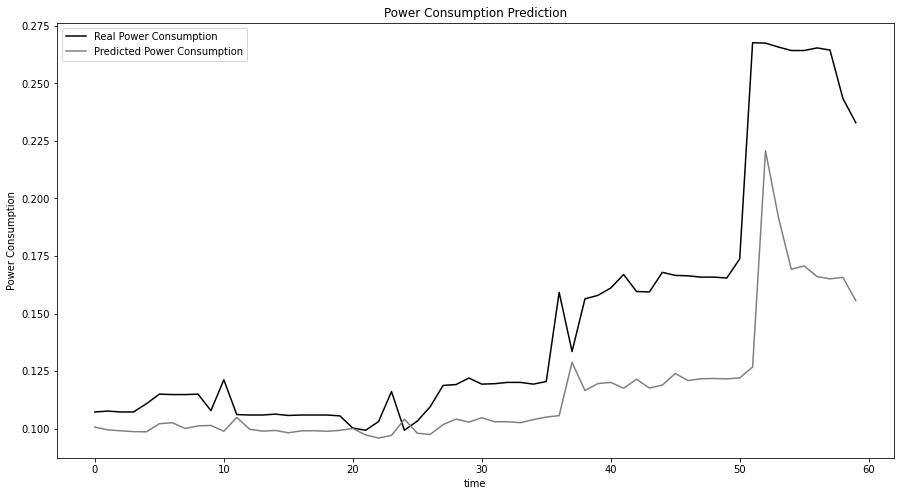

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_test[-60:], color = 'black', label = "Real Power Consumption")
plt.plot(y_pred[-60:], color = 'grey', label = 'Predicted Power Consumption')
plt.title('Power Consumption Prediction')
plt.xlabel('time')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()